<a href="https://colab.research.google.com/github/DavidkingMazimpaka/heart-disease-analysis/blob/main/heart_disease_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Analysis


---

1.   This project aims to analyze a dataset of medical records to identify patients with high risk of developing heart disease.
2.   I will use unsupervised learning techniques to cluster patients based on their medical history and identify risk factors associated with heart disease.


In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

### Importing necessary Libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 1. Load the Datasetand performing the Exploratory Data Analysis (EDA).

In [5]:
# Load the dataset
file_path = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
# Get basic information about the DataFrame
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

ca      4
thal    2
dtype: int64


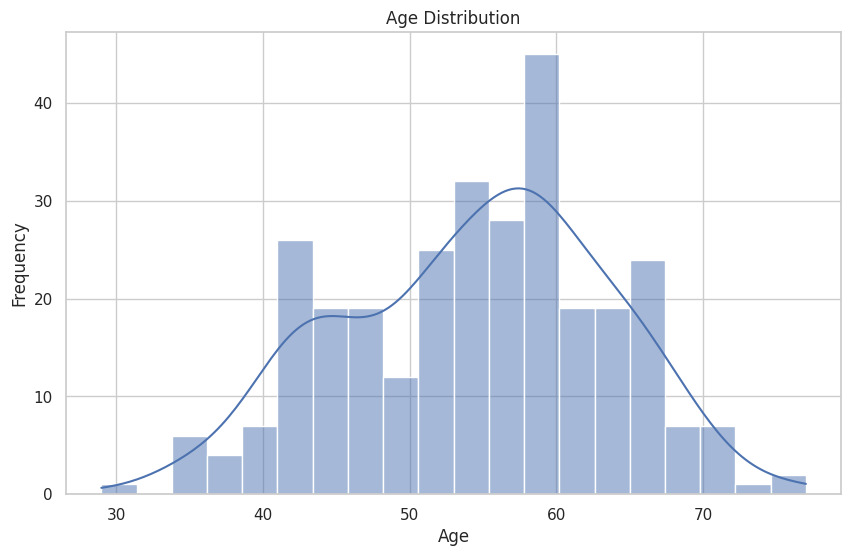

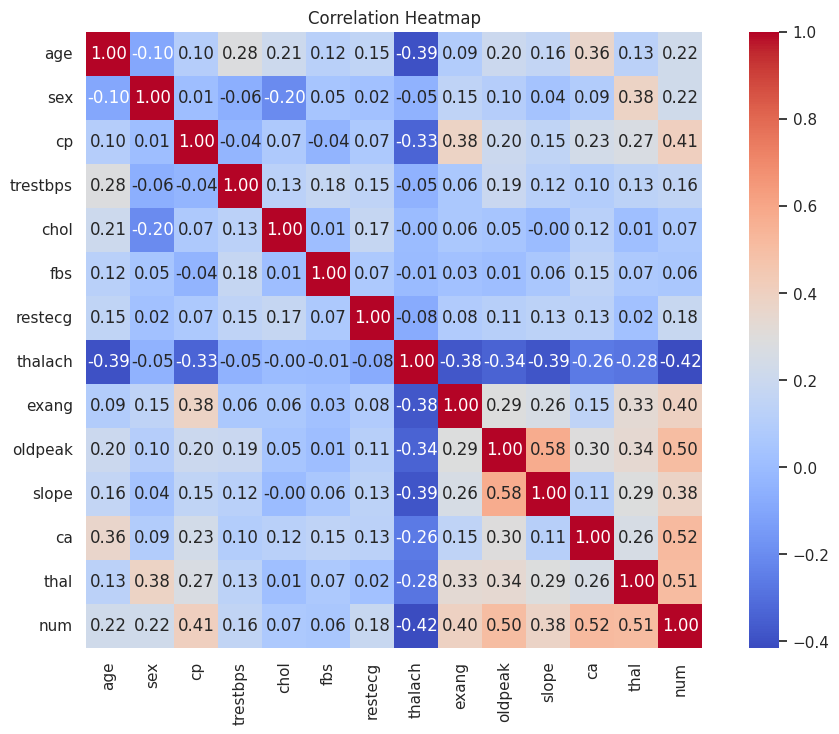

In [8]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

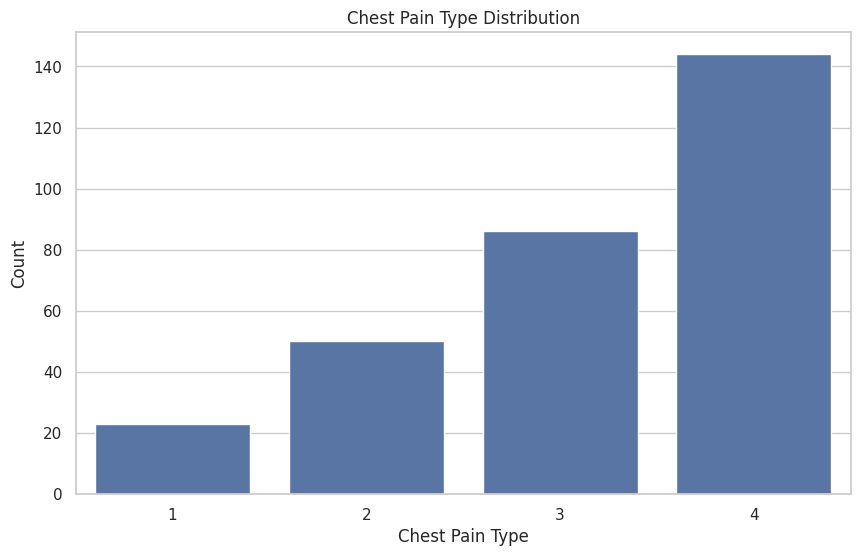

In [9]:
# Count plot for chest pain type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

### Let's identify High-Risk Patients

In [11]:
# Example: Identifying patients with cholesterol level > 200
high_risk_patients = df[df['chol'] > 200]
print(high_risk_patients)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
290   67    1   3       152   212    0        2      150      0      0.8   
291   55    0   2       132   342    0        0      166      0      1.2   
297   57    0   4       140   241    0        0      123      1      0.2   
298   45    1   1       110   264    0        0      132      0      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


## 2. Preprocessing the dataset by handling missing values

In [43]:
# Check for missing values again
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Option 1: Drop rows with missing values
#df_cleaned = df.dropna()

# Option 2: Fill missing values (example: with mean for numerical columns)
df.fillna(df.mean(), inplace=True)

ca      4
thal    2
dtype: int64


In [44]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
df_cleaned.loc[:, numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

In [45]:
# Identify categorical columns
categorical_features = df_cleaned.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

In [46]:
# Display the first few rows of the preprocessed DataFrame
df_encoded.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,-0.767668
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,0.855089
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,0.043711
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,-0.767668
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,-0.767668


## 3. Applying K-means clustering and optimizing for the number of ks in k means clusterings

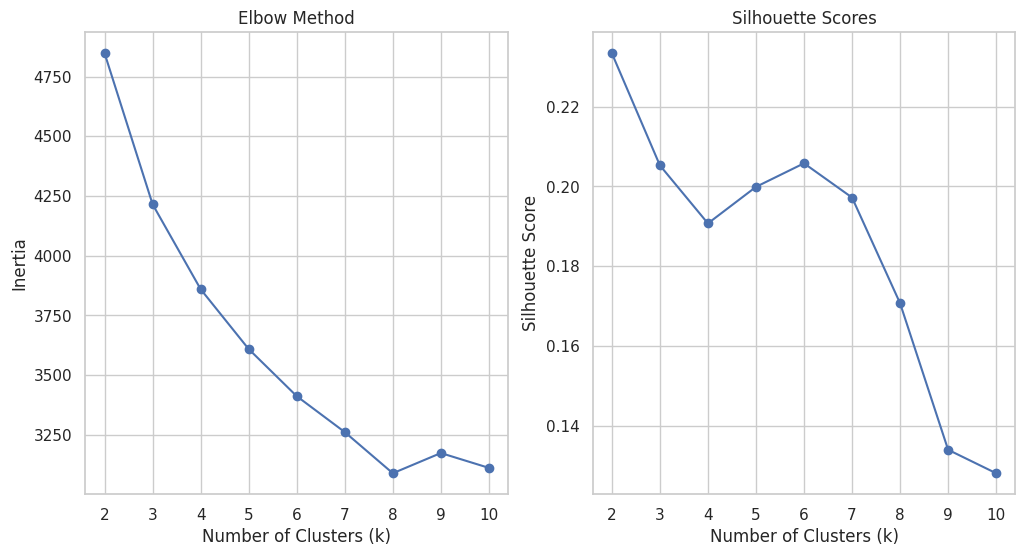

In [48]:
from sklearn.impute import SimpleImputer # Import SimpleImputer

features = df.select_dtypes(include=[np.number])  # Select numerical features

# Impute missing values using the mean
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
features_imputed = imputer.fit_transform(features)

# Scale the data after imputation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_imputed)

# Elbow Method
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.show()

# Choose optimal k based on the plots
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

### . Hierarchical Clustering

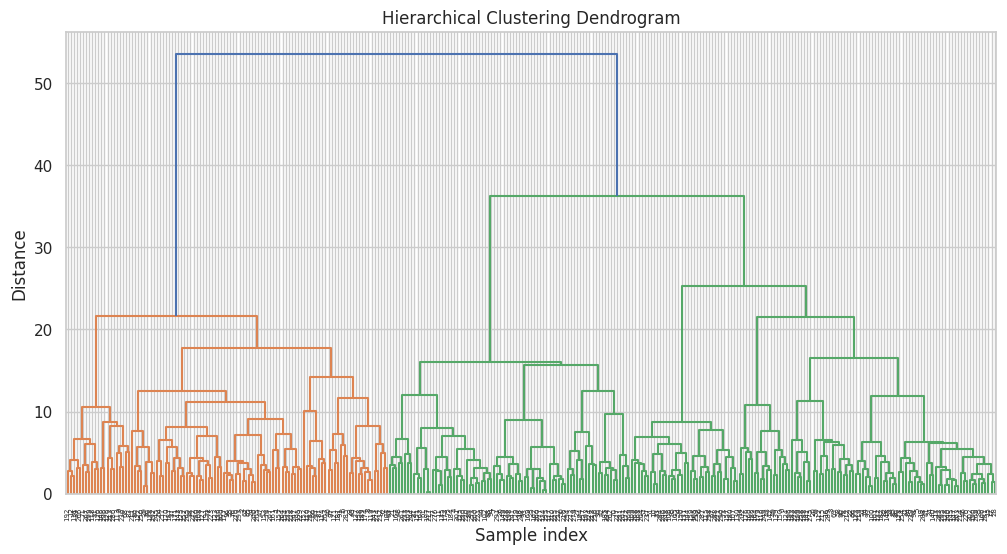

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# You can cut the dendrogram at a certain distance to form clusters
from scipy.cluster.hierarchy import fcluster

threshold = 5  # Choose a threshold to cut the dendrogram
df['Hierarchical_Cluster'] = fcluster(Z, threshold, criterion='distance')

### .DBSCAN Clustering

DBSCAN_Cluster
-1    303
Name: count, dtype: int64


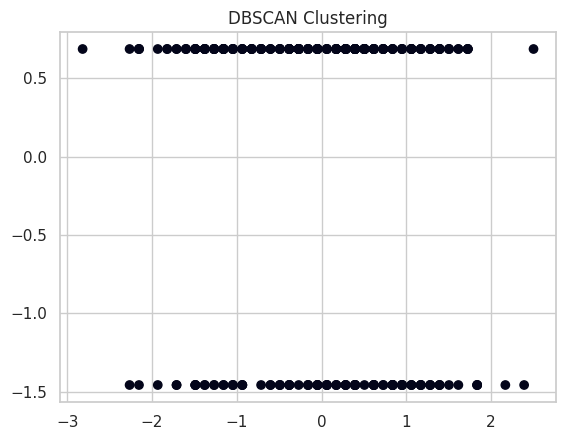

DBSCAN_Cluster
-1    303
Name: count, dtype: int64


In [50]:
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer # Import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming X is your DataFrame
# Select numerical features (modify if necessary)
numerical_features = X.select_dtypes(include=[np.number])

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your numerical data and transform it
X_imputed = imputer.fit_transform(numerical_features)

# Convert the imputed data back to DataFrame if needed:
X_imputed = pd.DataFrame(X_imputed, columns=numerical_features.columns, index=numerical_features.index)

# Now continue with your scaling and DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# DBSCAN with different parameters
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

# Store results in DataFrame
df['DBSCAN_Cluster'] = labels

# Check cluster counts
print(df['DBSCAN_Cluster'].value_counts())

# Calculate silhouette score (for non-noise points)
if len(set(labels)) > 1:  # Only compute if more than one cluster is formed
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score}")

# Plotting (only if data is 2D or 3D)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.title("DBSCAN Clustering")
plt.show()

print(df['DBSCAN_Cluster'].value_counts())

## 4. Principal component analysis (PCA) and t-SNE to visualize the clusters.

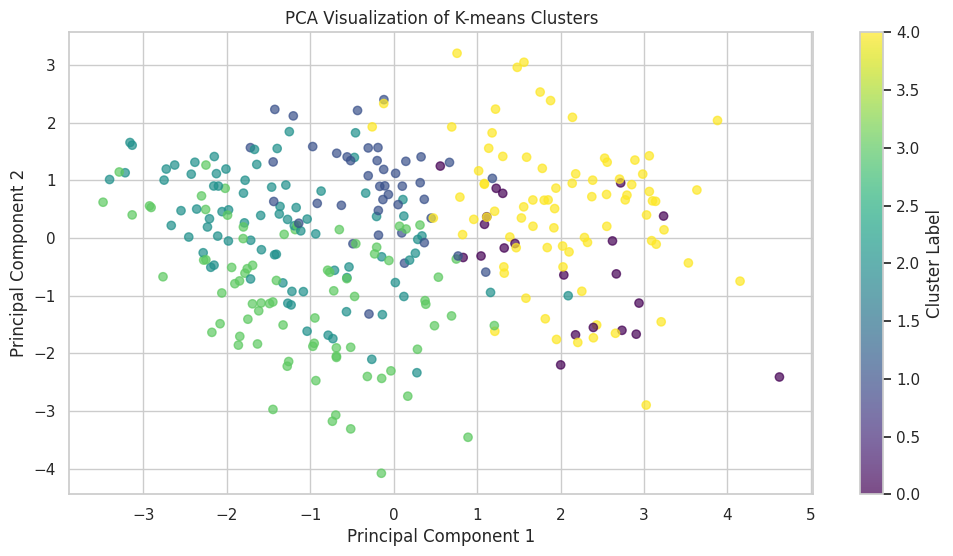

In [51]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize the clusters from K-means
plt.figure(figsize=(12, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA Visualization of K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

###  .t-Distributed Stochastic Neighbor Embedding (t-SNE)

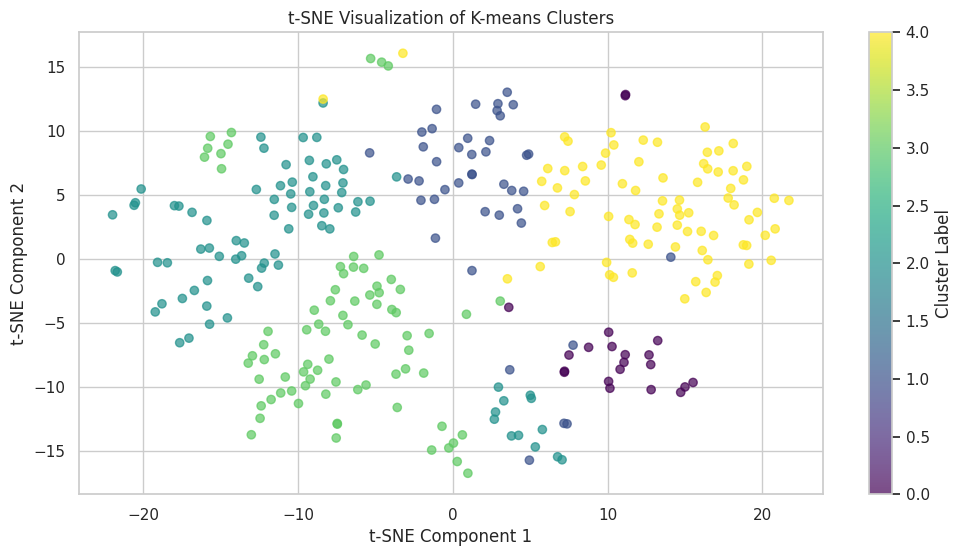

In [52]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for t-SNE results
df['tSNE1'] = X_tsne[:, 0]
df['tSNE2'] = X_tsne[:, 1]

# Visualize the clusters from K-means
plt.figure(figsize=(12, 6))
plt.scatter(df['tSNE1'], df['tSNE2'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of K-means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Conclusions from PCA and t-SNE Visualizations:


1.   **Cluster Separation**: Clear separation between clusters indicates distinct patient groups based on medical history, while significant overlap suggests similar characteristics among those groups.

2.   **Shape and Density:** t-SNE may reveal more complex structures within clusters, such as sub-groups, indicating varying densities or relationships among patients.

3. **Insights into Features:** Analyzing cluster characteristics can uncover relationships between medical conditions and specific features, helping identify trends in patient profiles.

4. **Assessing Clustering Methods:** Comparing visualizations from different clustering methods (K-means, hierarchical, DBSCAN) can reveal which technique provides the most meaningful groupings for the dataset.

**These insights guide further analysis and clinical considerations, enhancing understanding of patient relationships and potential interventions.**


## 5. Gaussian mixture models (GMMs)

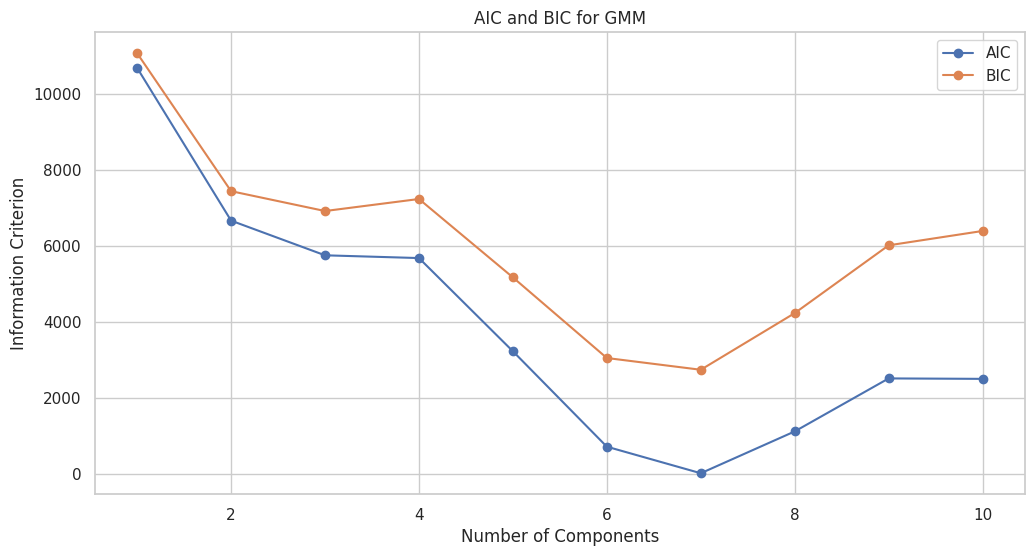

In [53]:
from sklearn.mixture import GaussianMixture

# Determine the optimal number of components
n_components_range = range(1, 11)
aic = []
bic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    aic.append(gmm.aic(X_scaled))
    bic.append(gmm.bic(X_scaled))

# Plot AIC and BIC
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.title('AIC and BIC for GMM')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.legend()
plt.show()

# Choose optimal number of components based on the plots
optimal_components = 3  # Replace with the chosen value based on AIC/BIC
gmm = GaussianMixture(n_components=optimal_components, random_state=42)
gmm.fit(X_scaled)

# Predict cluster labels
df['GMM_Cluster'] = gmm.predict(X_scaled)

### .Analyze Risk Factors
a. Examine Cluster Characteristics

In [54]:
# Analyze the distribution of features within each cluster
cluster_analysis = df.groupby('GMM_Cluster').mean()
print(cluster_analysis)

                   age  sex        cp    trestbps        chol       fbs  \
GMM_Cluster                                                               
0            58.764706  0.0  3.764706  145.882353  291.705882  0.235294   
1            53.834951  1.0  3.165049  130.912621  239.601942  0.160194   
2            55.075000  0.0  3.012500  130.675000  255.387500  0.100000   

              restecg    thalach     exang   oldpeak  ...        ca      thal  \
GMM_Cluster                                           ...                       
0            1.352941  138.00000  0.529412  1.994118  ...  1.235294  6.807895   
1            1.004854  148.84466  0.373786  1.120874  ...  0.731500  5.236574   
2            0.875000  154.03750  0.162500  0.627500  ...  0.400000  3.000000   

                  num  KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster  \
GMM_Cluster                                                                   
0            2.058824        2.764706             20.294118 

b. Visualize Clusters in Reduced Dimensions

*   We use PCA or t-SNE for visualization to see how the clusters are formed



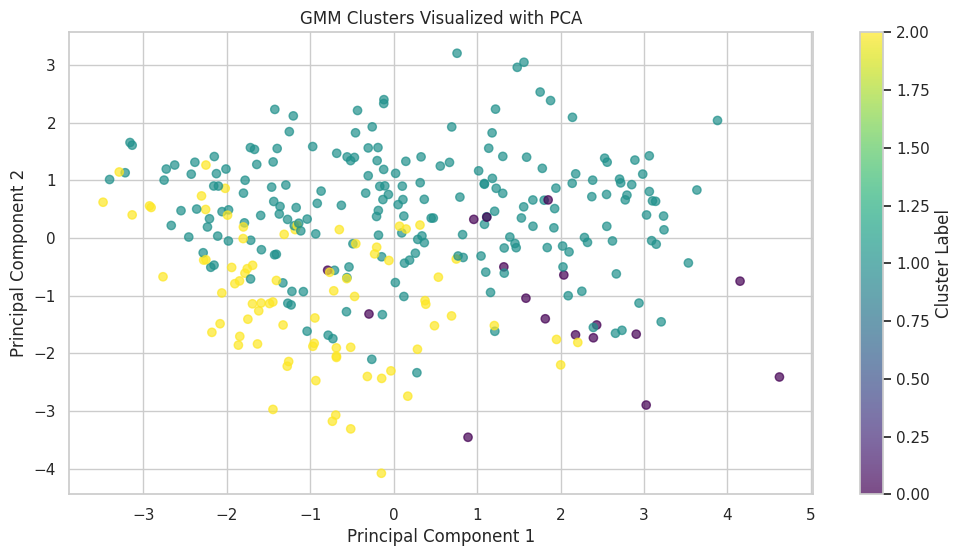

In [55]:
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(12, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['GMM_Cluster'], cmap='viridis', alpha=0.7)
plt.title('GMM Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## 6. Evaluating the clustering performance using metrics.

a. Calculate Silhouette Score



In [56]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['GMM_Cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.085


b. Calculate Davies-Bouldin Index



In [57]:
# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, df['GMM_Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin:.3f}')

Davies-Bouldin Index: 2.371


## 7. Choose Clustering Algorithms
  Consider the following popular clustering algorithms:

* K-means
* Gaussian Mixture Models (GMM)
* Hierarchical Clustering
* DBSCAN

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

features = df.select_dtypes(include=[np.number])  # Select numerical features

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Initialize a dictionary to store results
results = {}

# 1. K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  # Use your optimal_k from previous analysis
kmeans_labels = kmeans.fit_predict(X_scaled)
results['K-means'] = {
    'Silhouette Score': silhouette_score(X_scaled, kmeans_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, kmeans_labels),
}

# 2. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=optimal_components, random_state=42)  # Use your optimal_components
gmm_labels = gmm.fit_predict(X_scaled)
results['GMM'] = {
    'Silhouette Score': silhouette_score(X_scaled, gmm_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, gmm_labels),
}

# 3. Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)  # Use the same optimal_k
hierarchical_labels = hierarchical.fit_predict(X_scaled)
results['Hierarchical'] = {
    'Silhouette Score': silhouette_score(X_scaled, hierarchical_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, hierarchical_labels),
}

# 4. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(X_scaled)
# DBSCAN may return -1 for noise, which we can ignore in silhouette score
if len(set(dbscan_labels)) > 1:  # Ensure at least 2 clusters
    results['DBSCAN'] = {
        'Silhouette Score': silhouette_score(X_scaled, dbscan_labels),
        'Davies-Bouldin Index': davies_bouldin_score(X_scaled, dbscan_labels),
    }
else:
    results['DBSCAN'] = {
        'Silhouette Score': -1,  # No valid clustering
        'Davies-Bouldin Index': np.inf,  # No valid clustering
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

              Silhouette Score  Davies-Bouldin Index
K-means               0.190837              1.936623
GMM                   0.208357              1.734317
Hierarchical          0.224708              1.588364
DBSCAN               -1.000000                   inf


## Conclusion
### Based on the evaluation metrics:

* **Best Algorithm:** Hierarchical Clustering is the best-performing algorithm in this comparison, as it has both the highest Silhouette Score and the lowest Davies-Bouldin Index.
* **GMM and K-means:** Both have relatively low scores, indicating that their clusters are less distinct than those of the hierarchical method.
* **DBSCAN:** The results for DBSCAN are not useful in this case due to the negative Silhouette Score and infinite Davies-Bouldin Index, indicating that it struggled with the dataset, possibly due to noise or inappropriate parameter settings.